# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Alunas: Ana Julia Pietroski e Bárbara Girardi

O objeto deste estudo é o empreendimento Klabin S.A. da cidade de Correia Pinto (Latitude 27°32'54.16"S, Longitude 50°21'52.71"W). A unidade em questão foi construída em 1969 e é focada em produção de papel para embalagens, sendo a produção da celulose a principal atividade desenvolvida na fábrica.

A unidade de Correia Pinto possui licença ambiental para as atividades sob código "17.11.00 - Fabricação de Celulose" e "17.21.00 - Fabricação de Papel" da CONSEMA 98/2017.

## Etapa 1: Planilha dos fatores de emissão para cada processo da Klabin (linhas) e respectivo poluente (colunas)
- Referência para processos e poluentes/emissões de uma indústria de papel: AP-42, Capítulo 10.2 - Chemical Wood Pulping.

Neste capítulo trata sobre a extração da celulose, principal elemento para produção do papel, e os processos para tal, destacando o kraft, que tem grande potencial poluidor e é o principal componente utilizado na unidade da Klabin de Correia Pinto para produção do sackraft.

- Referência para estimativa de emissões: Inventário de Emissões Atmosféricas da Região da Grande Vitória (ano base 2015) do Instituto do Meio Ambiente e Recursos Hídricos (IEMA).

A empresa escolhida como referência é a Vipasa - Vitoria Industria e Comercio de Papeis SA (Brasil), pois esta realiza a mesma atividade que a Klabin (indústria de papel).

Em conjunto, será utilizado dados da AP-42, Capítulo 1.6 - Wood Residue Combustion in Boilers aliado aos dados do IEMA.


#### Segundo dados de monitoramento de emissões atmosféricas presente nas licenças ambientais nº7772/2020 e nº2119/2021 da Klabin, utilizam-se os seguintes equipamentos:
- Forno de cal (Lime kiln, cap 10.2);
- Condensador de terebitina (Turpentine condenser, cap 10.2);
- Caldeiras de força (Cap 1.6) (neste caso será estudada apenas a com maior emissão), sendo a Caldeira de Força 4. Para este estudo, será considerado que a biomassa em questão são restos de madeira.

  Será considerado que em cada processo acima passa a mesma quantidade de produtos que resultam na quantidade de produto final.

In [1]:
# ABRIR PLANILHA DE FATORES DE EMISSÕES COMPILADAS

#Utilizandos Pandas para abrir a planilha
import pandas as pd
import os

#Coletando o cminho da pasta que estou
cwd = os.getcwd()

#Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE' #pasta onde tenho os fatores de emissão
print(cwd)

#Indicando nome do arquivo
chapterNumber = 10
subChapter = 2
file = 'chpt_'+str(chapterNumber)+'_'+str(subChapter)+'.csv'

print(file)

#Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file)
print(fe)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
chpt_10_2.csv
                          Source    MP    SO2    CO
0  Tanque de dissolucao do smelt   3.5  0.100   NaN
1                   Forno de cal  28.0  0.150  0.05
2      Condensador de terebitina   NaN    NaN   NaN
3   Caldeira de forca (biomassa)   3.6  0.225  5.40


#### Os dados acima referem-se ao processo produtivo de celulose, principal objetivo da unidade da Klabin em questão. Dessa forma, será utilizado dados da produção de celulose deles.

Segundo informações presentes no site da empresa, a produção anual de celulose é de 1,6 milhão de toneladas. Considerando 23 unidades industriais no Brasil e Argentina, foi dividida a produção similarmente entre estas, resultando em aproximadamente 70 mil toneladas de celulose por ano por unidade. Logo, na unidade de Correia Pinto será considerada a produção anual de 70 mil toneladas/ano.

2457000.0


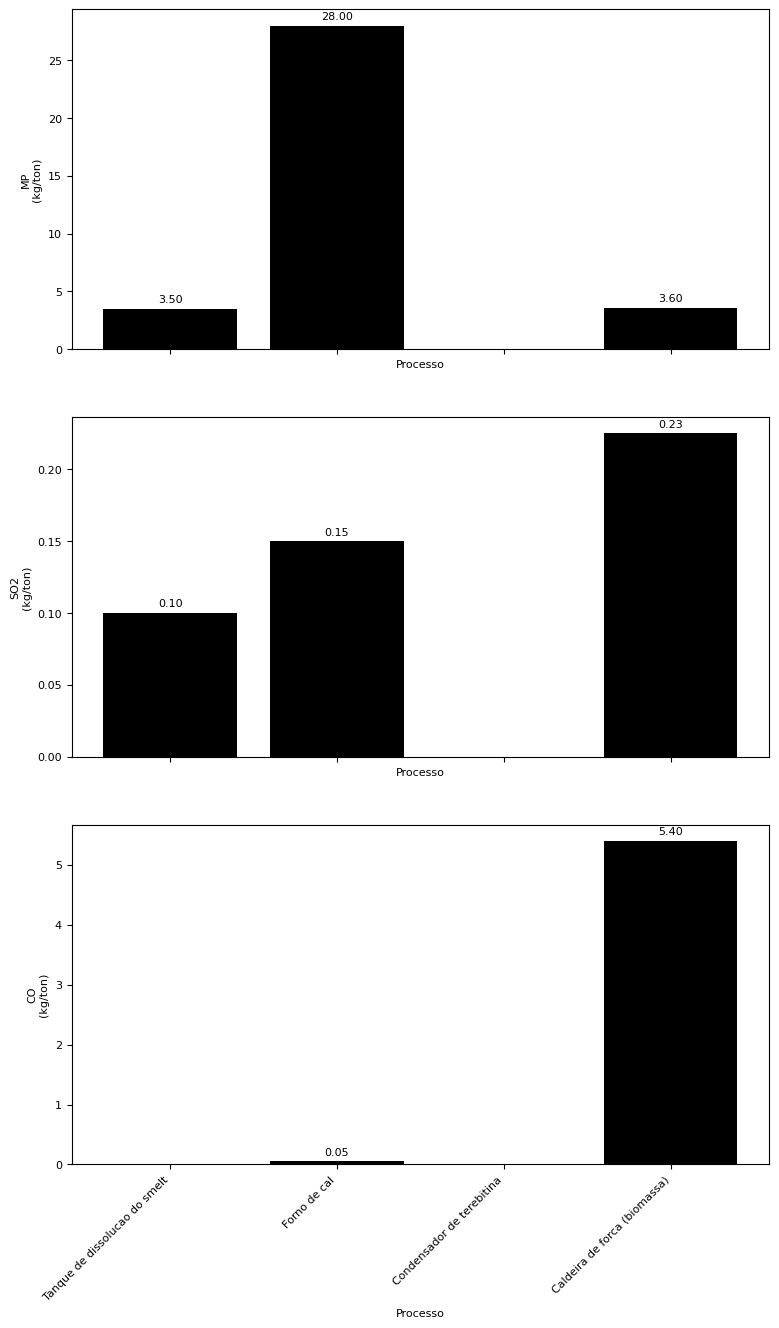

In [2]:
#Estimativa das emissões do empreendimento (e plotagem)

import matplotlib.pyplot as plt

atv = 70000 #Considerando taxa de atividade em toneladas/ano
emis = fe['MP']*atv

#Somando dataframe
print(emis.sum())

#Criando a figura com Matplotlib
#Subplots com número de linhas igual ao numero de poluentes
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex = True, figsize=(9, 15)) #sharex significa compartilhar o eixo x

#Look para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)): #a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Source'], fe.iloc[:,ii], color = 'black')
    ax[ii-1].set_xlabel('Processo', fontsize=8) #coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/ton)', fontsize=8)

    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    ax[ii-1].set_xticks(fe['Source'].index)
    ax[ii-1].set_xticklabels(fe['Source'], rotation=45, ha='right', fontsize=8)

# Adicionando valores acima das barras
    for bar, value in zip(ax[ii - 1].patches, fe.iloc[:, ii]):
        ax[ii - 1].annotate('{:.2f}'.format(value), xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=8)

#Salva a fig na pasta figures
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

#O gráfico a seguir representa o fator de emissão para cada processo, basicamente pegou os dados da tabela e apresentou em figura

In [3]:
df = pd.read_csv(path + '\\'+file)

# Encontrando a emissão dos poluentes para cada processo 
poluentes = ['MP', 'SO2', 'CO']
df[poluentes] *= atv

print(df)

                          Source         MP      SO2        CO
0  Tanque de dissolucao do smelt   245000.0   7000.0       NaN
1                   Forno de cal  1960000.0  10500.0    3500.0
2      Condensador de terebitina        NaN      NaN       NaN
3   Caldeira de forca (biomassa)   252000.0  15750.0  378000.0


Acima, a nova tabela representa a estimativa de emissão de cada poluente para cada atividade, com base na seguinte expressão: E = FE * Atv,

onde: E = emissão [kg/ano], FE = fator de emissão (AP-42) [kg/ton], Atv = taxa de atividade da Klabin [ton/ano]

Assim, temos os valores da taxa de emissão de cada processo para Material Particulado, SO2 e CO.

#### 1) Qual é o processo do empreendimento que possui maior emissão? Analise os fatores de emissão através de figuras, comparando os processos.
   R: O processo da Klabin que possui maior probabilidade de emissão é a Caldeira de Força, visto que esta emite altas taxas em todos os poluentes analisados, sendo que o CO é o mais emitido (5,4 kg/ton). O segundo processo que mais emite é o Forno de Cal, onde também contribui com a emissão de todos os poluentes analisados, sendo que material particulado é a maior taxa, 28 kg/ton.
   
   Em relação ao Condensador de Terebitina, a análise não resultou na emissão de nenhum poluente, por conta da falta de informações do fator de emissão na AP-42 (no data). Tal fato também ocorreu no tanque de smelt para o poluente CO.

   Logo, considerando os valores de emissão e respectiva taxa de atividade, tem-se que o poluente de maior emissão é o material particulado advindo do processo Forno de Cal, com 1.960.000 ton/ano de material particulado emitido pelo processo para esta produção.

## Etapa 2: Criando taxa de atividade aleatória com sazonalidade
Nesta etapa foi criada uma taxa de atividade para a Klabin que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

As possíveis sazonalidades que podem ocorrer na produção de celulose tem a ver com a disponibilidade de matéria-prima (pinus e eucalipto), por exemplo. Para levar em conta essa taxa sazonal, será considerado que nos meses de primavera (outubro, novembro e dezembro) há maior produção, devido ao crescimento mais acelerado das árvores. 

Por outro lado, será considerado também um momento onde há menor produção. Este será na data da Parada Geral, um evento que ocorre anualmente na Klabin e que tem por objetivo a manutenção dos equipamentos. Essa parada ocorre durante 10 dias, sendo neste ano de 27 de agosto a 6 de setembro de 2024 na unidade de Correia Pinto.

Em relação à taxa de atividade da Klabin, considerando a produção anteriormente mencionada de 70000 toneladas/ano, consideraremos a atividade máxima mensal da empresa com a produção de 5833 ton/mês - a qual foi definida como a média da produção anual - enquanto a atividade mínima será considerada 3888 ton/mês - a qual foi dimensionada considerando que a Parada Geral ocorre em 1/3 de um mês qualquer e neste período não há produção.

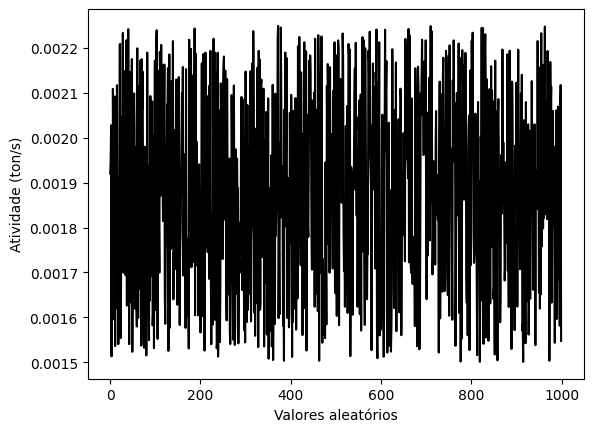

In [29]:
# Criando vetor de valores aleatórios. Será criado em ton/dia para melhor cálculo das etapas seguintes.
import numpy as np
atvMax = 0.00225 #atividade máxima de produção em ton/s
atvMin = 0.00150 #atividade mínima diária de produção em ton/s
n = 1000 #1000 valores aleatórios
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin

#Criando uma figura com os valores aleatórios
fig, ax = plt.subplots()

plt.xlabel('Valores aleatórios')
plt.ylabel('Atividade (ton/s)')
    
ax.plot(atv, color = 'black')

In [30]:
# Criar um vetor com as datas para o ano de 2024

from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2024, 1, 1)
data_final = datetime(2024, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00


In [31]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.dayofyear

# Mostrar o DataFrame resultante
print(df)

          Data  Mes  Dia
0   2024-01-01    1    1
1   2024-01-02    1    2
2   2024-01-03    1    3
3   2024-01-04    1    4
4   2024-01-05    1    5
..         ...  ...  ...
361 2024-12-27   12  362
362 2024-12-28   12  363
363 2024-12-29   12  364
364 2024-12-30   12  365
365 2024-12-31   12  366

[366 rows x 3 columns]


In [32]:
#Ajustar meus numeros aleatórios com base no comprimento do vetor de datas

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
#Extraindo o número de linhas/datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv*(60*60*24) #para que a atividade fique em ton/dia

print(df)
df.to_csv(r"C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\tabelas\ativ.csv")


# Criando uma figura com os valores aleatórios
#fig, ax= plt.subplots()
#ax.plot(datas, atv)

          Data  Mes  Dia   atividade
0   2024-01-01    1    1  166.221218
1   2024-01-02    1    2  186.315542
2   2024-01-03    1    3  152.175817
3   2024-01-04    1    4  152.497372
4   2024-01-05    1    5  168.359989
..         ...  ...  ...         ...
361 2024-12-27   12  362  181.973250
362 2024-12-28   12  363  177.006005
363 2024-12-29   12  364  184.627408
364 2024-12-30   12  365  187.542138
365 2024-12-31   12  366  143.471181

[366 rows x 4 columns]


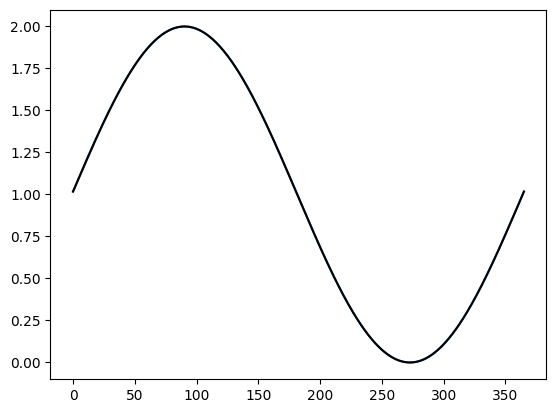

In [38]:
meses = np.arange(1, 13)

# Criando componente sazonal
sazonalidade = (np.sin(2* np.pi * df['Dia'] / 365)) + 1

df['sazonalidade'] = sazonalidade 
plt.plot(sazonalidade)
df.to_csv(r"C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\tabelas\ativ2.csv")
plt.plot(sazonalidade, color = 'black')

O gráfico anterior apresenta a componente sazonal criada. Em seguida, será ajustada a um gráfico de acordo com a produção:

323.99058439573224


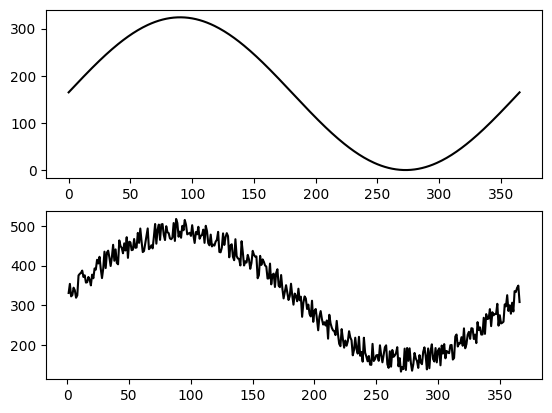

In [39]:
df['aleatorio'] =  (atvMax - atvMin)*np.random.rand(n) + atvMin

aleatorioSazonal = (df['atividade'] +  df['sazonalidade']*df['atividade'].mean())
df['aleatorioSazonal'] = aleatorioSazonal

fig,ax= plt.subplots(2)

ax[1].plot(df['Dia'], df['aleatorioSazonal'], color = 'black')
ax[0].plot(df['sazonalidade']*df['atividade'].mean(), color = 'black')
print(df['aleatorioSazonal'].mean())

O primeiro gráfico representa a sazonalidade ao longo do ano, utilizando a função seno e variando de 0 a 2, para evitar valores negativos de produção. Logo, reflete a amplitude da sazonalidade ao longo do ano.

Já o segundo gráfico representa os dados aleatórios sazonais ao longo do ano, omostra a produção ajustada considerando esses dados sazonais e aleatórios.

Este gráfico representa a atividade sazonal de produção pelos meses do ano. Optou-se por esta representação no formato de seno pois é a que melhor se encaixa para a produção em questão.

#### 2)Qual a variabilidade temporal da taxa de atividade? Estime esta taxa e demonstre a componente sazonal (variabilidade entre meses) e aleatória?
    R: Apresentado a seguir

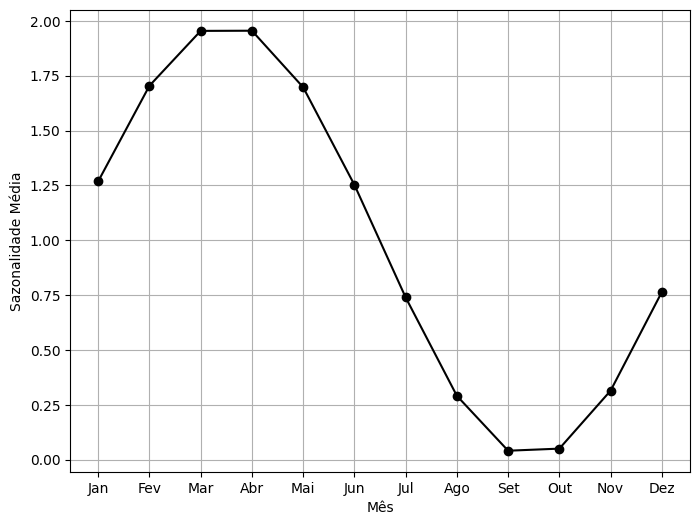

In [40]:
caminho = "C:\\Users\\Acer\\Desktop\\ENS5173_Barbara\\ENS5173_Barbara\\tabelas\\ativ2.csv"
df = pd.read_csv(caminho)

# Calcular a média da sazonalidade ao longo dos meses
media_sazonalidade = df.groupby('Mes')['sazonalidade'].mean()

# Plotar a sazonalidade média ao longo dos meses
plt.figure(figsize=(8, 6))
plt.plot(media_sazonalidade, marker='o', linestyle='-', color='black')
plt.xlabel('Mês')
plt.ylabel('Sazonalidade Média')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

Assim, é possível entender como a atividade varia ao longo do ano e os padrões de variação ao longo dos meses.

## Etapa 3: Estimar as emissões com a função criada anteriormente com os dados de entrada criados no início.

Agora iremos utilizar os dados da produção para fazer o cálculo com as emissões de cada poluente apresentado no início do código.

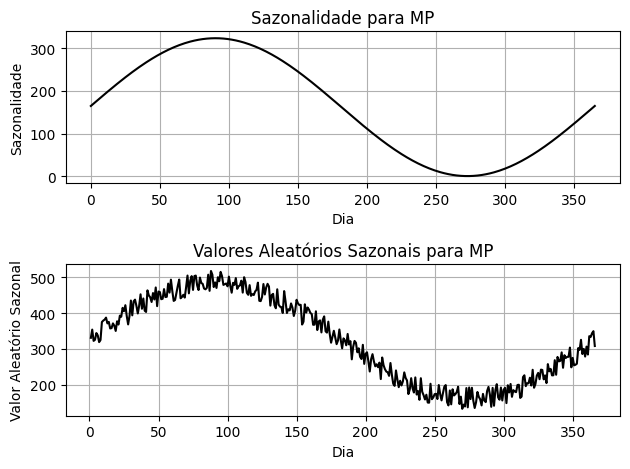

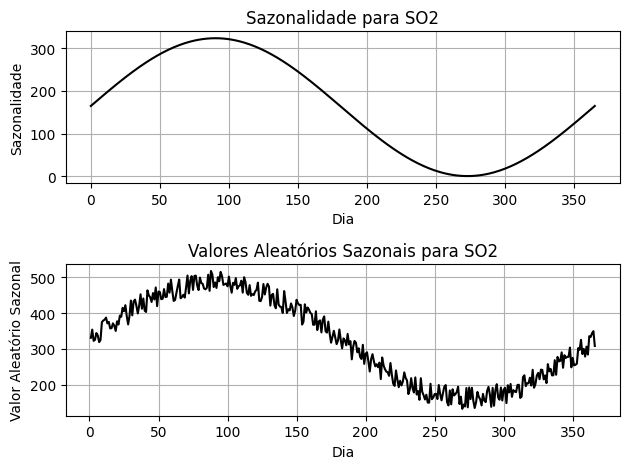

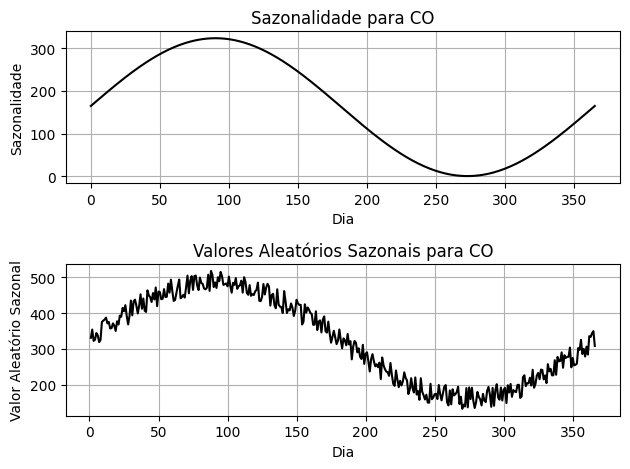

In [41]:
poluentes = ['MP', 'SO2', 'CO']

for poluente in poluentes:
    df['aleatorioSazonal'] = aleatorioSazonal
    
    fig, ax = plt.subplots(2) # Criando os subplots
    
    # Plotando o gráfico dos valores aleatórios com sazonalidade
    ax[1].plot(df['Dia'], df['aleatorioSazonal'], color='black')
    ax[1].set_title('Valores Aleatórios Sazonais para {}'.format(poluente))
    ax[1].set_xlabel('Dia')
    ax[1].set_ylabel('Valor Aleatório Sazonal')
    ax[1].grid(True)
    
    # Plotando o gráfico da sazonalidade
    ax[0].plot(df['sazonalidade'] * df['atividade'].mean(), color='black')
    ax[0].set_title('Sazonalidade para {}'.format(poluente))
    ax[0].set_xlabel('Dia')
    ax[0].set_ylabel('Sazonalidade')
    ax[0].grid(True)
    
    plt.tight_layout()
    plt.show()

Nesta etapa plotamos gráficos para os poluentes MP, SO2 e CO mostrando tanto a sazonalidade, quanto os valores aleatórios sazonais associados a cada poluente.

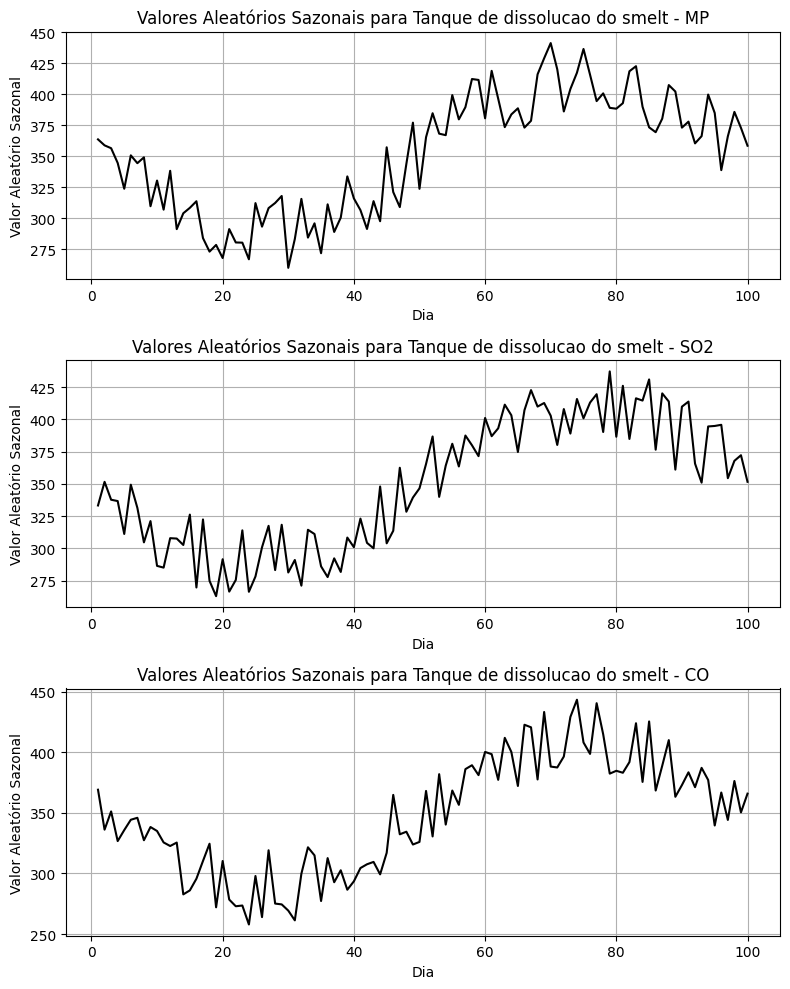

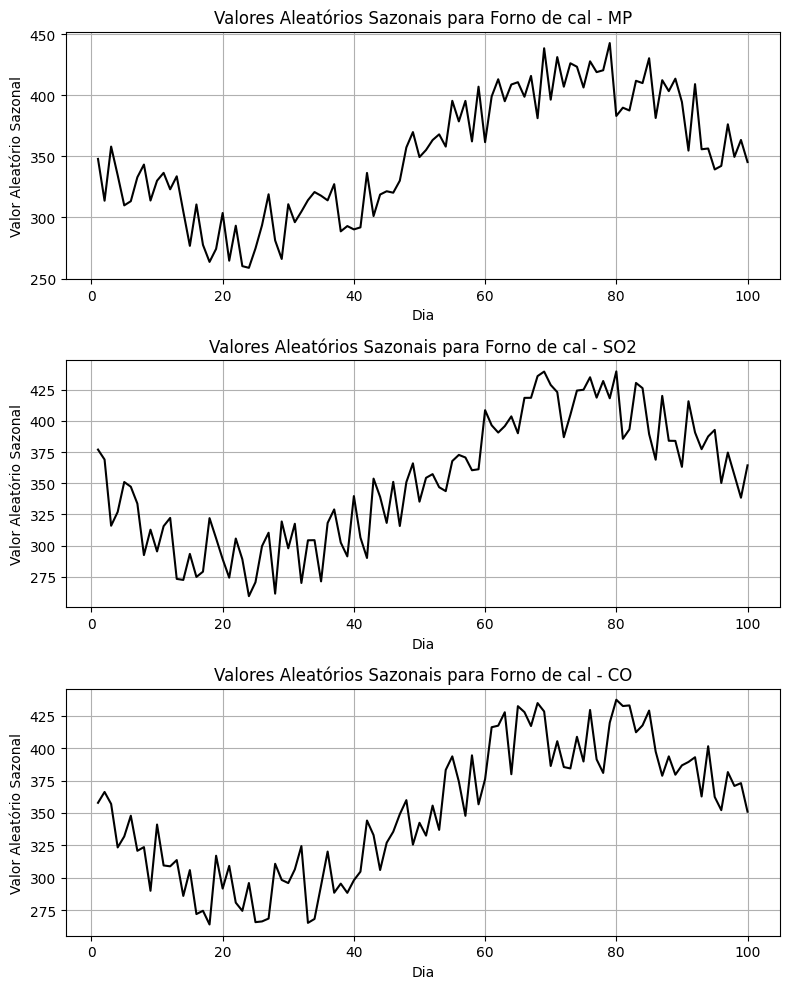

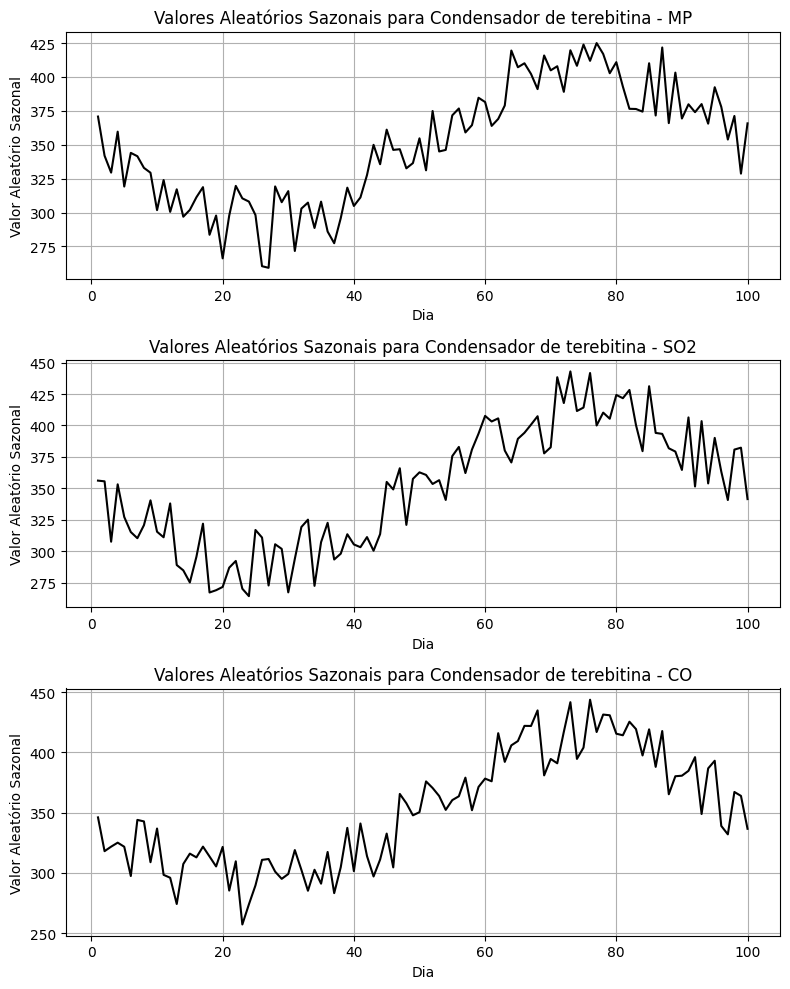

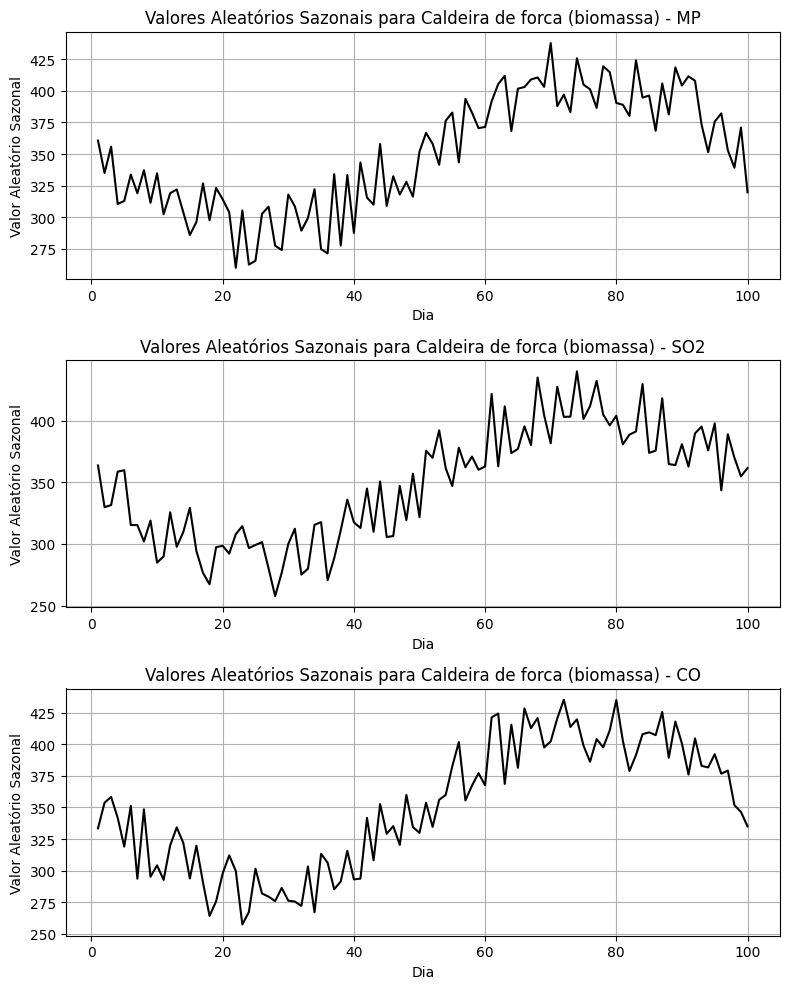

In [45]:
caminhofe = "C:\\Users\\Acer\\Desktop\\ENS5173_Barbara\\ENS5173_Barbara\\tabelas\\FE\\chpt_10_2.csv"
df = pd.read_csv(caminhofe)

n = 100  # Tamanho dos dados
atvMax = 191  # Atividade máxima
atvMin = 128  # Atividade mínima
dias = np.arange(1, n+1)  # Dias

# Lista de poluentes
poluentes = ['MP', 'SO2', 'CO']

# Para cada fonte de emissão, vamos criar os gráficos
for source in fe['Source'].unique():
    # Criando o gráfico
    fig, axs = plt.subplots(3, 1, figsize=(8, 10))
    
    # Para cada poluente, vamos gerar os valores aleatórios com sazonalidade senoidal
    for i, poluente in enumerate(poluentes):
        # Criando a sazonalidade senoidal
        sazonalidade = atvMax - (atvMax - atvMin) * np.sin(2 * np.pi * dias / n)
        
        # Gerando valores aleatórios com sazonalidade senoidal
        aleatorioSazonal = (atvMax - atvMin) * np.random.rand(n) + atvMin + sazonalidade
        
        # Plotando o gráfico dos valores aleatórios com sazonalidade
        axs[i].plot(dias, aleatorioSazonal, color='black')
        axs[i].set_title('Valores Aleatórios Sazonais para {} - {}'.format(source, poluente))
        axs[i].set_xlabel('Dia')
        axs[i].set_ylabel('Valor Aleatório Sazonal')
        axs[i].grid(True)
    
    plt.tight_layout()
    plt.show()

#### 3) Qual a soma das emissões considerando todos os processos? Qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)
R: